In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

In [4]:
df.head()
#mpg는 연비를 나타냄

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [6]:
df.drop(['car_name','horsepower', 'origin'], inplace = True, axis=1) #axis=1은 열을 기준으로 움직이라는 뜻
df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [13]:
df.shape

(398, 6)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
Y = df['mpg']
X = df.drop(['mpg'], inplace=False, axis=1)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
lr = LinearRegression()

In [12]:
# 선형 회귀 분석: 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
Y_predict = lr.predict(X_test)

In [14]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2_score : {r2_score(Y_test, Y_predict):.3f}")

MSE : 12.278
RMSE : 3.504
R2_score : 0.808


In [31]:
print(f'Y절편 값: {np.round(lr.intercept_,2)}')
print(f'회귀 계수 값: {np.round(lr.coef_,2)}')

Y절편 값: -17.55
회귀 계수 값: [-0.14  0.01 -0.01  0.2   0.76]


## 분석 모델 구축, 결과 분석 및 시각화 ㄱㄱ

In [32]:
# 회귀 계수를 확인하여 자동차 연비에 끼치는 피처의 영향 분석
coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False) #ascending은 오름차순...!

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [35]:
# 시각화 PART
import matplotlib.pyplot as plt
import seaborn as sns

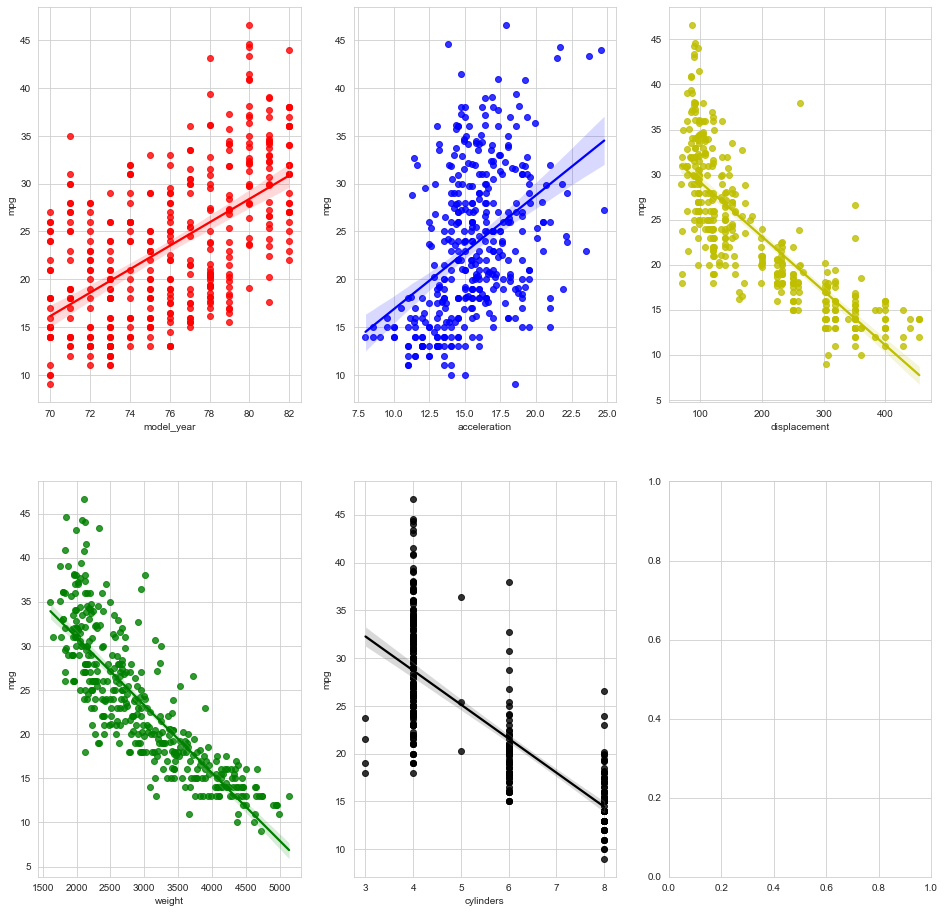

In [37]:
fig, axs = plt.subplots(figsize=(16,16), ncols = 3, nrows =2) #2행3열구조, 총 5개의 그래프
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_colors = ['r', 'b', 'y', 'g', 'k']
for i, feature in enumerate(x_features):
    row=int(i/3)
    col=i%3
    sns.regplot(x=feature, y='mpg', data=df, ax = axs[row][col], color=plot_colors[i])

## 완성된 자동차 연비 예측 모델을 사용하여 임의의 데이터를 입력하면 연비를 예측할 수 있음

In [38]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders1 = int(input("cylinders:"))
displacement1 = int(input("displacement:"))
weight1 = int(input("weight:"))
acceleration1 = int(input("acceleration:"))
model_year1 = int(input("model_year:"))

연비를 예측하고 싶은 차의 정보를 입력해주세요.


In [39]:
mpg_predict =lr.predict([[cylinders1, displacement1, weight1, acceleration1, model_year1]])

In [48]:
print(f"이 자동차의 예상 연비는 {np.round(mpg_predict,3)} 입니다.")

이 자동차의 예상 연비는 [41.32] 입니다.
